In [11]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input250sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.97265625
0.99609375
0.99609375
0.97265625
0.98828125
0.96875
0.98828125
0.9765625
0.99609375
0.96484375


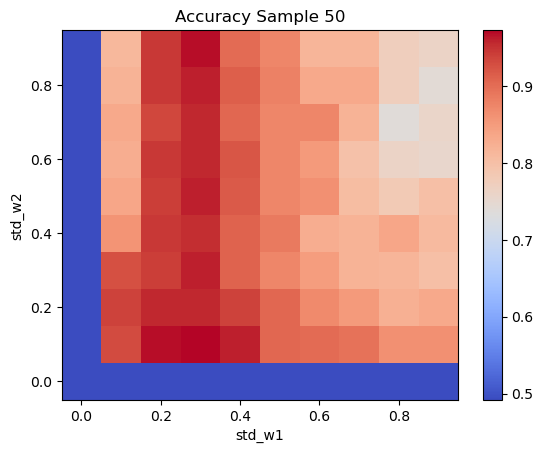

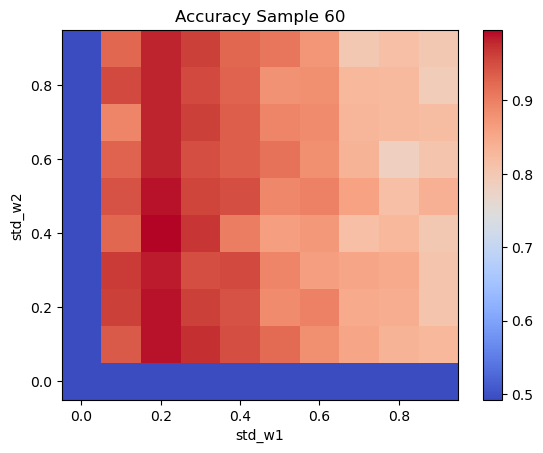

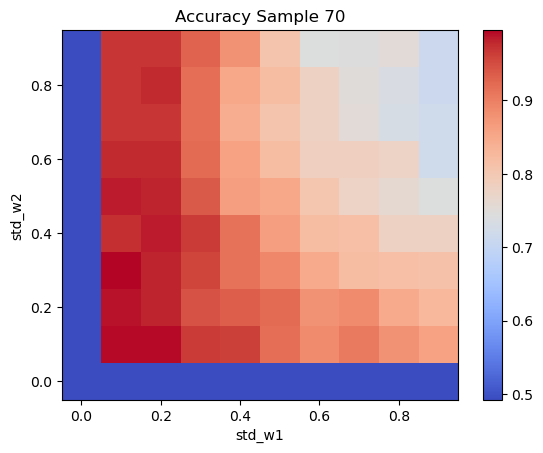

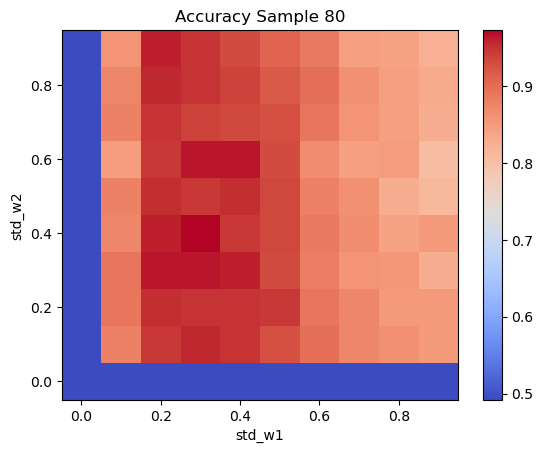

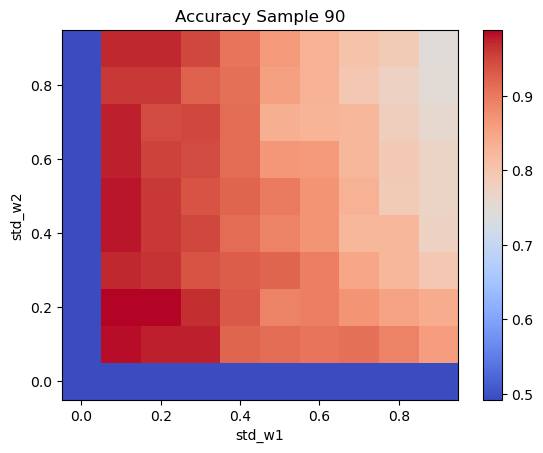

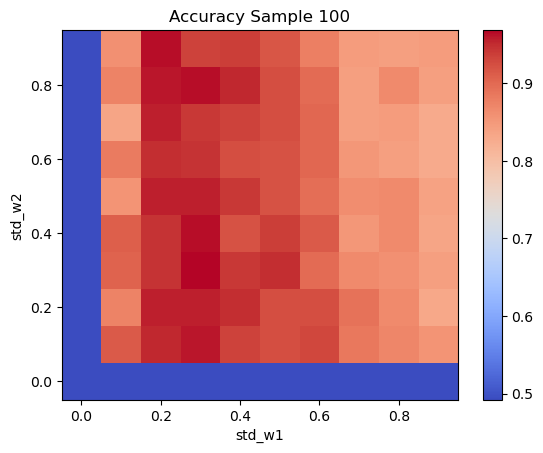

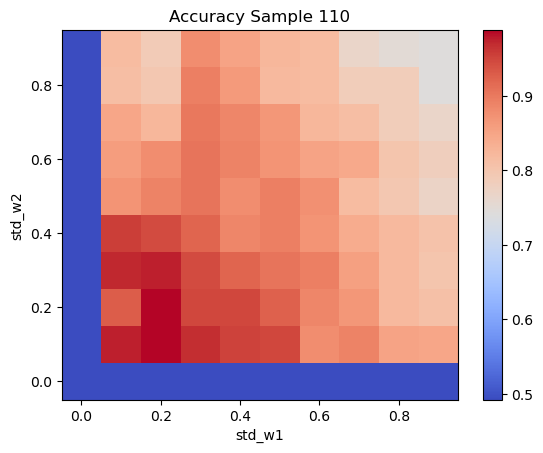

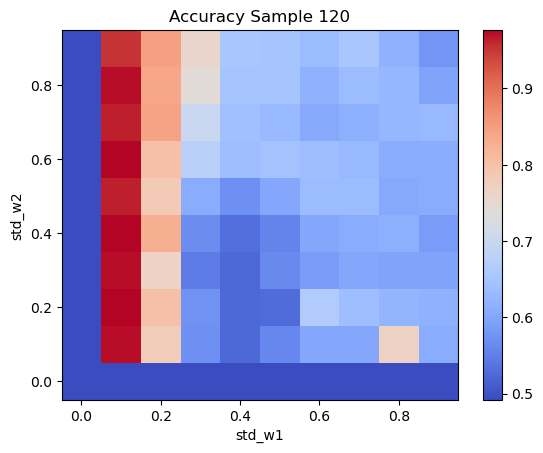

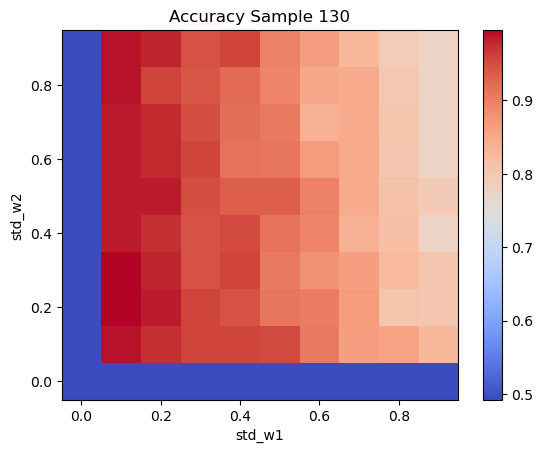

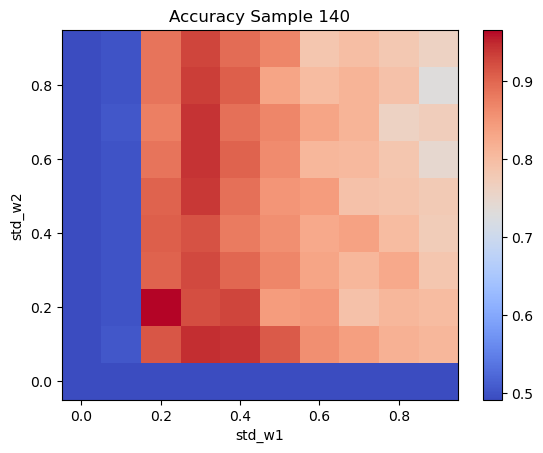

In [12]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T, cmap ='coolwarm')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [13]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [14]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.9078125 , 0.90429688, 0.90976563, 0.89414063,
        0.88007813, 0.87617188, 0.86875   , 0.87265625, 0.865625  ],
       [0.4921875 , 0.94804687, 0.95625   , 0.940625  , 0.94453125,
        0.934375  , 0.92929688, 0.92539063, 0.92617187, 0.9296875 ],
       [0.4921875 , 0.92460937, 0.9140625 , 0.91015625, 0.9125    ,
        0.90976563, 0.91640625, 0.915625  , 0.91835937, 0.9203125 ],
       [0.4921875 , 0.90507812, 0.89960938, 0.89101562, 0.87578125,
        0.88203125, 0.88632813, 0.88007813, 0.88359375, 0.88359375],
       [0.4921875 , 0.88828125, 0.86835938, 0.8703125 , 0.85976562,
        0.86523438, 0.86171875, 0.85351562, 0.84726563, 0.85234375],
       [0.4921875 , 0.86523438, 0.86601562, 0.84257812, 0.83867187,
        0.84609375, 0.83164063, 0.8265625 , 0.82109375, 0.81289062],
       [0.4921875 , 0.85234375, 0.8386718

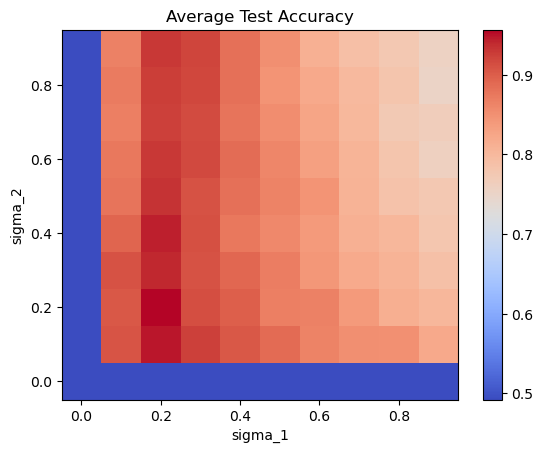

In [15]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_accuracy_grid_250_0.1.png".format(sample))

In [16]:
average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [17]:
test1 = average_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_accuracy_grid_10_by_10_10_samples>0.92460936)

print(test2)


[0.90976563 0.90976563 0.91015625 0.9125     0.9140625  0.915625
 0.91640625 0.91835937 0.9203125  0.92460937 0.92539063 0.92617187
 0.92929688 0.9296875  0.934375   0.940625   0.94453125 0.94804687
 0.95625   ]


In [18]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.1
    array.append(tbw1_w2)

In [19]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 250
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("accuracy_250_seed_{}.npz".format(i),**data)
    i+=1

In [20]:
data = {}
data['frequency'] = 65
data['N'] = 250
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("accuracy_250",**data)